In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # import statsmodels 
from scipy.stats import percentileofscore
from statsmodels.tsa.arima_process import ArmaProcess

76.9 percent of the t-stats are significant


Text(0.5, 1.0, 'Simulation of tvalues when observations = 100')

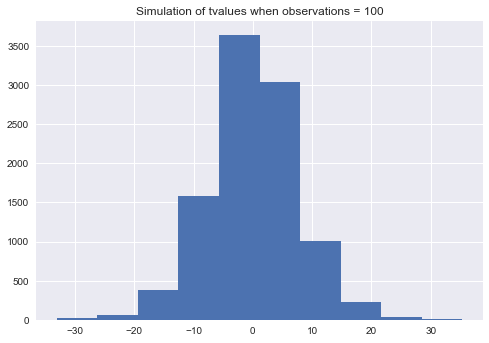

In [2]:
ar1 = [1, -0.99]
ma0 = [1, 0]
AR_object1 = ArmaProcess(ar1, ma0)
np.random.seed(seed=1)
observation = 100
y = np.random.randn(10000, observation).cumsum(axis=1)
x = np.random.randn(10000, observation).cumsum(axis=1)
y = np.vstack((np.zeros(len(y)),y.T)).T
x = np.vstack((np.zeros(len(x)),x.T)).T
tvalue = []
for i in range(10000):
    # X = np.stack((np.array([1.0]*1000),np.array(y[0]))).T
    Y = y[i]
    X = sm.add_constant(x[i]) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)
    tvalue.append(model.tvalues[1])
significant = 100 - (percentileofscore(tvalue, 1.96) - percentileofscore(tvalue, -1.96))
print('{} percent of the t-stats are significant'.format(round(significant,2)))
plt.style.use('seaborn')
plt.hist(tvalue)
plt.title('Simulation of tvalues when observations = {}'.format(observation))


70.08 percent of the t-stats are significant


(array([2.400e+01, 2.260e+02, 1.092e+03, 3.614e+03, 3.687e+03, 1.150e+03,
        1.790e+02, 2.600e+01, 1.000e+00, 1.000e+00]),
 array([-23.92031738, -17.96617874, -12.01204011,  -6.05790147,
         -0.10376284,   5.85037579,  11.80451443,  17.75865306,
         23.7127917 ,  29.66693033,  35.62106897]),
 <a list of 10 Patch objects>)

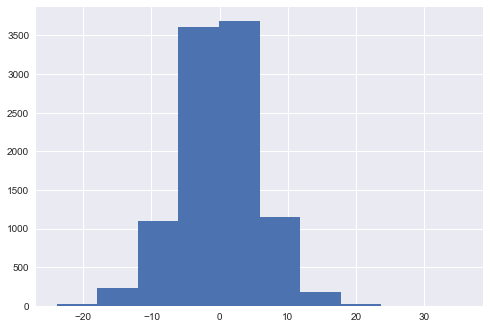

In [3]:
ar1 = [1, -0.99]
ma0 = [1]
AR_object = ArmaProcess(ar1, ma0)
tvalue = []
for i in range(10000):
    Y = AR_object.generate_sample(100)
    x = AR_object.generate_sample(100)
    X = sm.add_constant(x)

    # Note the difference in argument order
    model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)
    tvalue.append(model.tvalues[1])
significant = 100 - (percentileofscore(tvalue, 1.96) - percentileofscore(tvalue, -1.96))
print('{} percent of the t-stats are significant'.format(round(significant,2)))
plt.style.use('seaborn')
plt.hist(tvalue)

In [8]:
np.random.randn(2,2)

array([[ 0.55334479,  1.90829163],
       [-1.65718447,  0.63693024]])

In [9]:
import array

In [12]:
array.array()

TypeError: array() takes at least 1 argument (0 given)

In [14]:
a=array.array('i')#整数，b与i类似
a.append(8)
a.append(81)
a

array('i', [8, 81])

In [28]:
a

array('i', [8, 81])
